#**MOHAMMAD SHARIQ**
# ***2020220***
# **ML-ASS4**



SECTION B

In [7]:
import numpy as np

def convolution_forward(input_data, kernel, stride=1, padding=0):
    """
    Forward pass of the convolution operation.

    Parameters:
    - input_data: 3D numpy array representing the input data (height x width x channels)
    - kernel: 3D numpy array representing the convolution kernel (height x width x channels)
    - stride: Stride of the convolution operation
    - padding: Padding applied to the input data

    Returns:
    - output: 3D numpy array representing the result of the convolution operation
    - cache: Tuple containing (input_data, kernel, stride, padding) for later use in the backward pass
    """
    # Apply zero-padding to the input data
    padded_input = np.pad(input_data, ((padding, padding), (padding, padding), (0, 0)), mode='constant')

    # Get dimensions of input and kernel
    input_height, input_width, input_channels = padded_input.shape
    kernel_height, kernel_width, _ = kernel.shape

    # Calculate output dimensions
    output_height = (input_height - kernel_height) // stride + 1
    output_width = (input_width - kernel_width) // stride + 1

    # Initialize output
    output = np.zeros((output_height, output_width))

    # Perform convolution
    for h in range(0, output_height, stride):
        for w in range(0, output_width, stride):
            output[h, w] = np.sum(padded_input[h:h+kernel_height, w:w+kernel_width, :] * kernel)

    cache = (input_data, kernel, stride, padding)
    return output, cache

def convolution_backward(doutput, cache):
    """
    Backward pass of the convolution operation.

    Parameters:
    - doutput: Gradient of the loss with respect to the output of the convolution
    - cache: Tuple containing (input_data, kernel, stride, padding) from the forward pass

    Returns:
    - dinput: Gradient of the loss with respect to the input of the convolution
    - dkernel: Gradient of the loss with respect to the convolution kernel
    """
    input_data, kernel, stride, padding = cache

    # Get dimensions
    input_height, input_width, input_channels = input_data.shape
    kernel_height, kernel_width, _ = kernel.shape

    # Initialize gradients
    dinput = np.zeros_like(input_data)
    dkernel = np.zeros_like(kernel)

    # Perform backward pass
    for h in range(0, input_height - kernel_height + 1, stride):
        for w in range(0, input_width - kernel_width + 1, stride):
            dinput[h:h+kernel_height, w:w+kernel_width, :] += doutput[h, w] * kernel
            dkernel += doutput[h, w] * input_data[h:h+kernel_height, w:w+kernel_width, :]

    return dinput, dkernel


def max_pooling_forward(input_data, pool_size=2, stride=2):
    """
    Forward pass of the max pooling operation.

    Parameters:
    - input_data: 3D numpy array representing the input data (height x width x channels)
    - pool_size: Size of the pooling window
    - stride: Stride of the pooling operation

    Returns:
    - output: 3D numpy array representing the result of the max pooling operation
    - cache: Tuple containing (input_data, pool_size, stride, mask) for later use in the backward pass
    """
    # Get dimensions of input
    input_height, input_width, input_channels = input_data.shape

    # Calculate output dimensions
    output_height = (input_height - pool_size) // stride + 1
    output_width = (input_width - pool_size) // stride + 1

    # Initialize output and mask
    output = np.zeros((output_height, output_width, input_channels))
    mask = np.zeros_like(input_data)

    # Perform max pooling
    for h in range(0, input_height - pool_size + 1, stride):
        for w in range(0, input_width - pool_size + 1, stride):
            window = input_data[h:h+pool_size, w:w+pool_size, :]
            max_value = np.max(window, axis=(0, 1))
            output[h//stride, w//stride, :] = max_value
            mask[h:h+pool_size, w:w+pool_size, :][window == max_value] = 1

    cache = (input_data, pool_size, stride, mask)
    return output, cache

def max_pooling_backward(doutput, cache):
    """
    Backward pass of the max pooling operation.

    Parameters:
    - doutput: Gradient of the loss with respect to the output of the max pooling
    - cache: Tuple containing (input_data, pool_size, stride, mask) from the forward pass

    Returns:
    - dinput: Gradient of the loss with respect to the input of the max pooling
    """
    input_data, pool_size, stride, mask = cache

    # Initialize gradient
    dinput = np.zeros_like(input_data)

    # Perform backward pass
    doutput = doutput.reshape(doutput.shape[0], doutput.shape[1], 1, doutput.shape[2])
    mask = mask.reshape(mask.shape[0], mask.shape[1], 1, mask.shape[2])
    dinput = doutput * mask

    return dinput

# Test the convolution function
input_data_conv = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]]])
kernel_conv = np.array([[[1, 0, -1], [1, 0, -1], [1, 0, -1]]])

conv_output, conv_cache = convolution_forward(input_data_conv, kernel_conv)
print("Convolution Output:")
print(conv_output)

doutput_conv = np.array([[1]])
dinput_conv, dkernel_conv = convolution_backward(doutput_conv, conv_cache)
print("\nConvolution Backward:")
print("Gradient with respect to input:")
print(dinput_conv)
print("Gradient with respect to kernel:")
print(dkernel_conv)

# Test the max pooling function
input_data_pool = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
pool_output, pool_cache = max_pooling_forward(input_data_pool)
print("\nMax Pooling Output:")
print(pool_output)

doutput_pool = np.array([[[1, 2], [3, 4]]])
dinput_pool = max_pooling_backward(doutput_pool, pool_cache)
print("\nMax Pooling Backward:")
print("Gradient with respect to input:")
print(dinput_pool)


Convolution Output:
[[-6.]]

Convolution Backward:
Gradient with respect to input:
[[[ 1  0 -1]
  [ 1  0 -1]
  [ 1  0 -1]]]
Gradient with respect to kernel:
[[[1 2 3]
  [4 5 6]
  [7 8 9]]]

Max Pooling Output:
[[[7. 8.]]]

Max Pooling Backward:
Gradient with respect to input:
[[[[0 0]]

  [[0 0]]]


 [[[0 0]]

  [[3 4]]]]


In [30]:
def convolutionForward(input_data, kernel, stride=1, padding=0):
    input_height, input_width = input_data.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate output dimensions
    output_height = (input_height - kernel_height + 2 * padding) // stride + 1
    output_width = (input_width - kernel_width + 2 * padding) // stride + 1

    # Apply zero-padding
    padded_input = np.pad(input_data, padding, mode='constant')

    # Initialize output
    output = np.zeros((output_height, output_width))

    # Performing  convolution
    for i in range(0, output_height, stride):
        for j in range(0, output_width, stride):
            output[i, j] = np.sum(padded_input[i:i+kernel_height, j:j+kernel_width] * kernel)

    return output



input_data = np.random.rand(5, 5)  #  input data
print(input_data)
kernel = np.random.rand(3, 3)  # input kernel
print()
print(kernel)
output = convolutionForward(input_data, kernel)
print()
print("Convolution Forward Output:")
print(output)


[[0.49161588 0.47347177 0.17320187 0.43385165 0.39850473]
 [0.6158501  0.63509365 0.04530401 0.37461261 0.62585992]
 [0.50313626 0.85648984 0.65869363 0.16293443 0.07056875]
 [0.64241928 0.02651131 0.58577558 0.94023024 0.57547418]
 [0.38816993 0.64328822 0.45825289 0.54561679 0.94146481]]

[[0.38610264 0.96119056 0.90535064]
 [0.19579113 0.0693613  0.100778  ]
 [0.01822183 0.09444296 0.68300677]]

Convolution Forward Output:
[[1.51086348 1.09641844 1.01819052]
 [1.52784063 1.55570315 1.58409307]
 [2.18133008 1.67957185 1.41563095]]


In [31]:
def convolutionBackward(input_data, kernel, output_gradient, stride=1,padding=0):
    input_height, input_width = input_data.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate output dimensions
    output_height = (input_height - kernel_height + 2 * padding) // stride + 1
    output_width = (input_width - kernel_width + 2 * padding) // stride + 1

    # Apply zero-padding
    padded_input = np.pad(input_data, padding, mode='constant')

    # Initialize gradients
    input_gradient = np.zeros_like(input_data)
    kernel_gradient = np.zeros_like(kernel)

    # Performing backward pass
    for i in range(0, output_height, stride):
        for j in range(0, output_width, stride):
            input_gradient[i:i+kernel_height, j:j+kernel_width] += kernel * output_gradient[i, j]
            kernel_gradient += padded_input[i:i+kernel_height, j:j+kernel_width] * output_gradient[i, j]

    return input_gradient, kernel_gradient

# Example usage
output_gradient = np.random.rand(3, 3)  # Example gradient from the next layer
input_gradient, kernel_gradient = convolutionBackward(input_data, kernel, output_gradient)

print(output_gradient)
print("\nConvolution Backward Input Gradient:")
print(input_gradient)
print("\nConvolution Backward Kernel Gradient:")
print(kernel_gradient)


[[0.07118865 0.31897563 0.84487531]
 [0.02327194 0.81446848 0.28185477]
 [0.11816483 0.69673717 0.62894285]]

Convolution Backward Input Gradient:
[[0.02748612 0.19158319 0.69725564 1.10087097 0.76490841]
 [0.02292346 0.40422753 1.10747146 1.09904309 0.34032225]
 [0.05147738 0.55620644 1.22767935 1.63461073 1.17487413]
 [0.02355968 0.16165    0.28132806 0.69674676 0.25589232]
 [0.00215318 0.02385566 0.15796979 0.53527543 0.42957222]]

Convolution Backward Kernel Gradient:
[[1.94720431 1.27538819 1.20571161]
 [1.64244819 1.98111992 1.90566698]
 [1.8494633  1.88991758 2.12653401]]


In [32]:
def max_pooling_forward(input_data, pool_size=2, stride=2):
    input_height, input_width = input_data.shape

    # Calculate output dimensions
    output_height = (input_height - pool_size) // stride + 1
    output_width = (input_width - pool_size) // stride + 1

    # Initialize output
    output = np.zeros((output_height, output_width))

    # Perform max pooling
    for i in range(0, output_height, stride):
        for j in range(0, output_width, stride):
            output[i, j] = np.max(input_data[i:i+pool_size, j:j+pool_size])

    return output


input_data_pool = np.random.rand(4, 4)  # input
print(input_data_pool)
output_pool = max_pooling_forward(input_data_pool)
print("\nMax Pooling Forward Output:")
print(output_pool)


[[0.87747201 0.73507104 0.80348093 0.28203457]
 [0.17743954 0.75061475 0.80683474 0.99050514]
 [0.41261768 0.37201809 0.77641296 0.34080354]
 [0.93075733 0.85841275 0.42899403 0.75087107]]

Max Pooling Forward Output:
[[0.87747201 0.        ]
 [0.         0.        ]]


In [34]:
def maxPoolingBackward(input_data, output_gradient, pool_size=2, stride=2):
    input_height, input_width = input_data.shape

    # Calculate output dimensions
    output_height = (input_height - pool_size) // stride + 1
    output_width = (input_width - pool_size) // stride + 1

    # Initialize gradient
    input_gradient = np.zeros_like(input_data)

    # Perform backward pass
    for i in range(0, output_height, stride):
        for j in range(0, output_width, stride):
            pool_slice = input_data[i:i+pool_size, j:j+pool_size]
            max_value = np.max(pool_slice)
            mask = pool_slice == max_value
            input_gradient[i:i+pool_size, j:j+pool_size] += mask * output_gradient[i, j]

    return input_gradient


output_gradient_pool = np.random.rand(2, 2)  # gradient from the next layer
input_gradient_pool = maxPoolingBackward(input_data_pool, output_gradient_pool)
print(output_gradient_pool)
print("\nMax Pooling Backward Input Gradient:")
print(input_gradient_pool)


[[0.82645747 0.3200496 ]
 [0.89552323 0.38920168]]

Max Pooling Backward Input Gradient:
[[0.82645747 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]



# **SECTION C**


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.

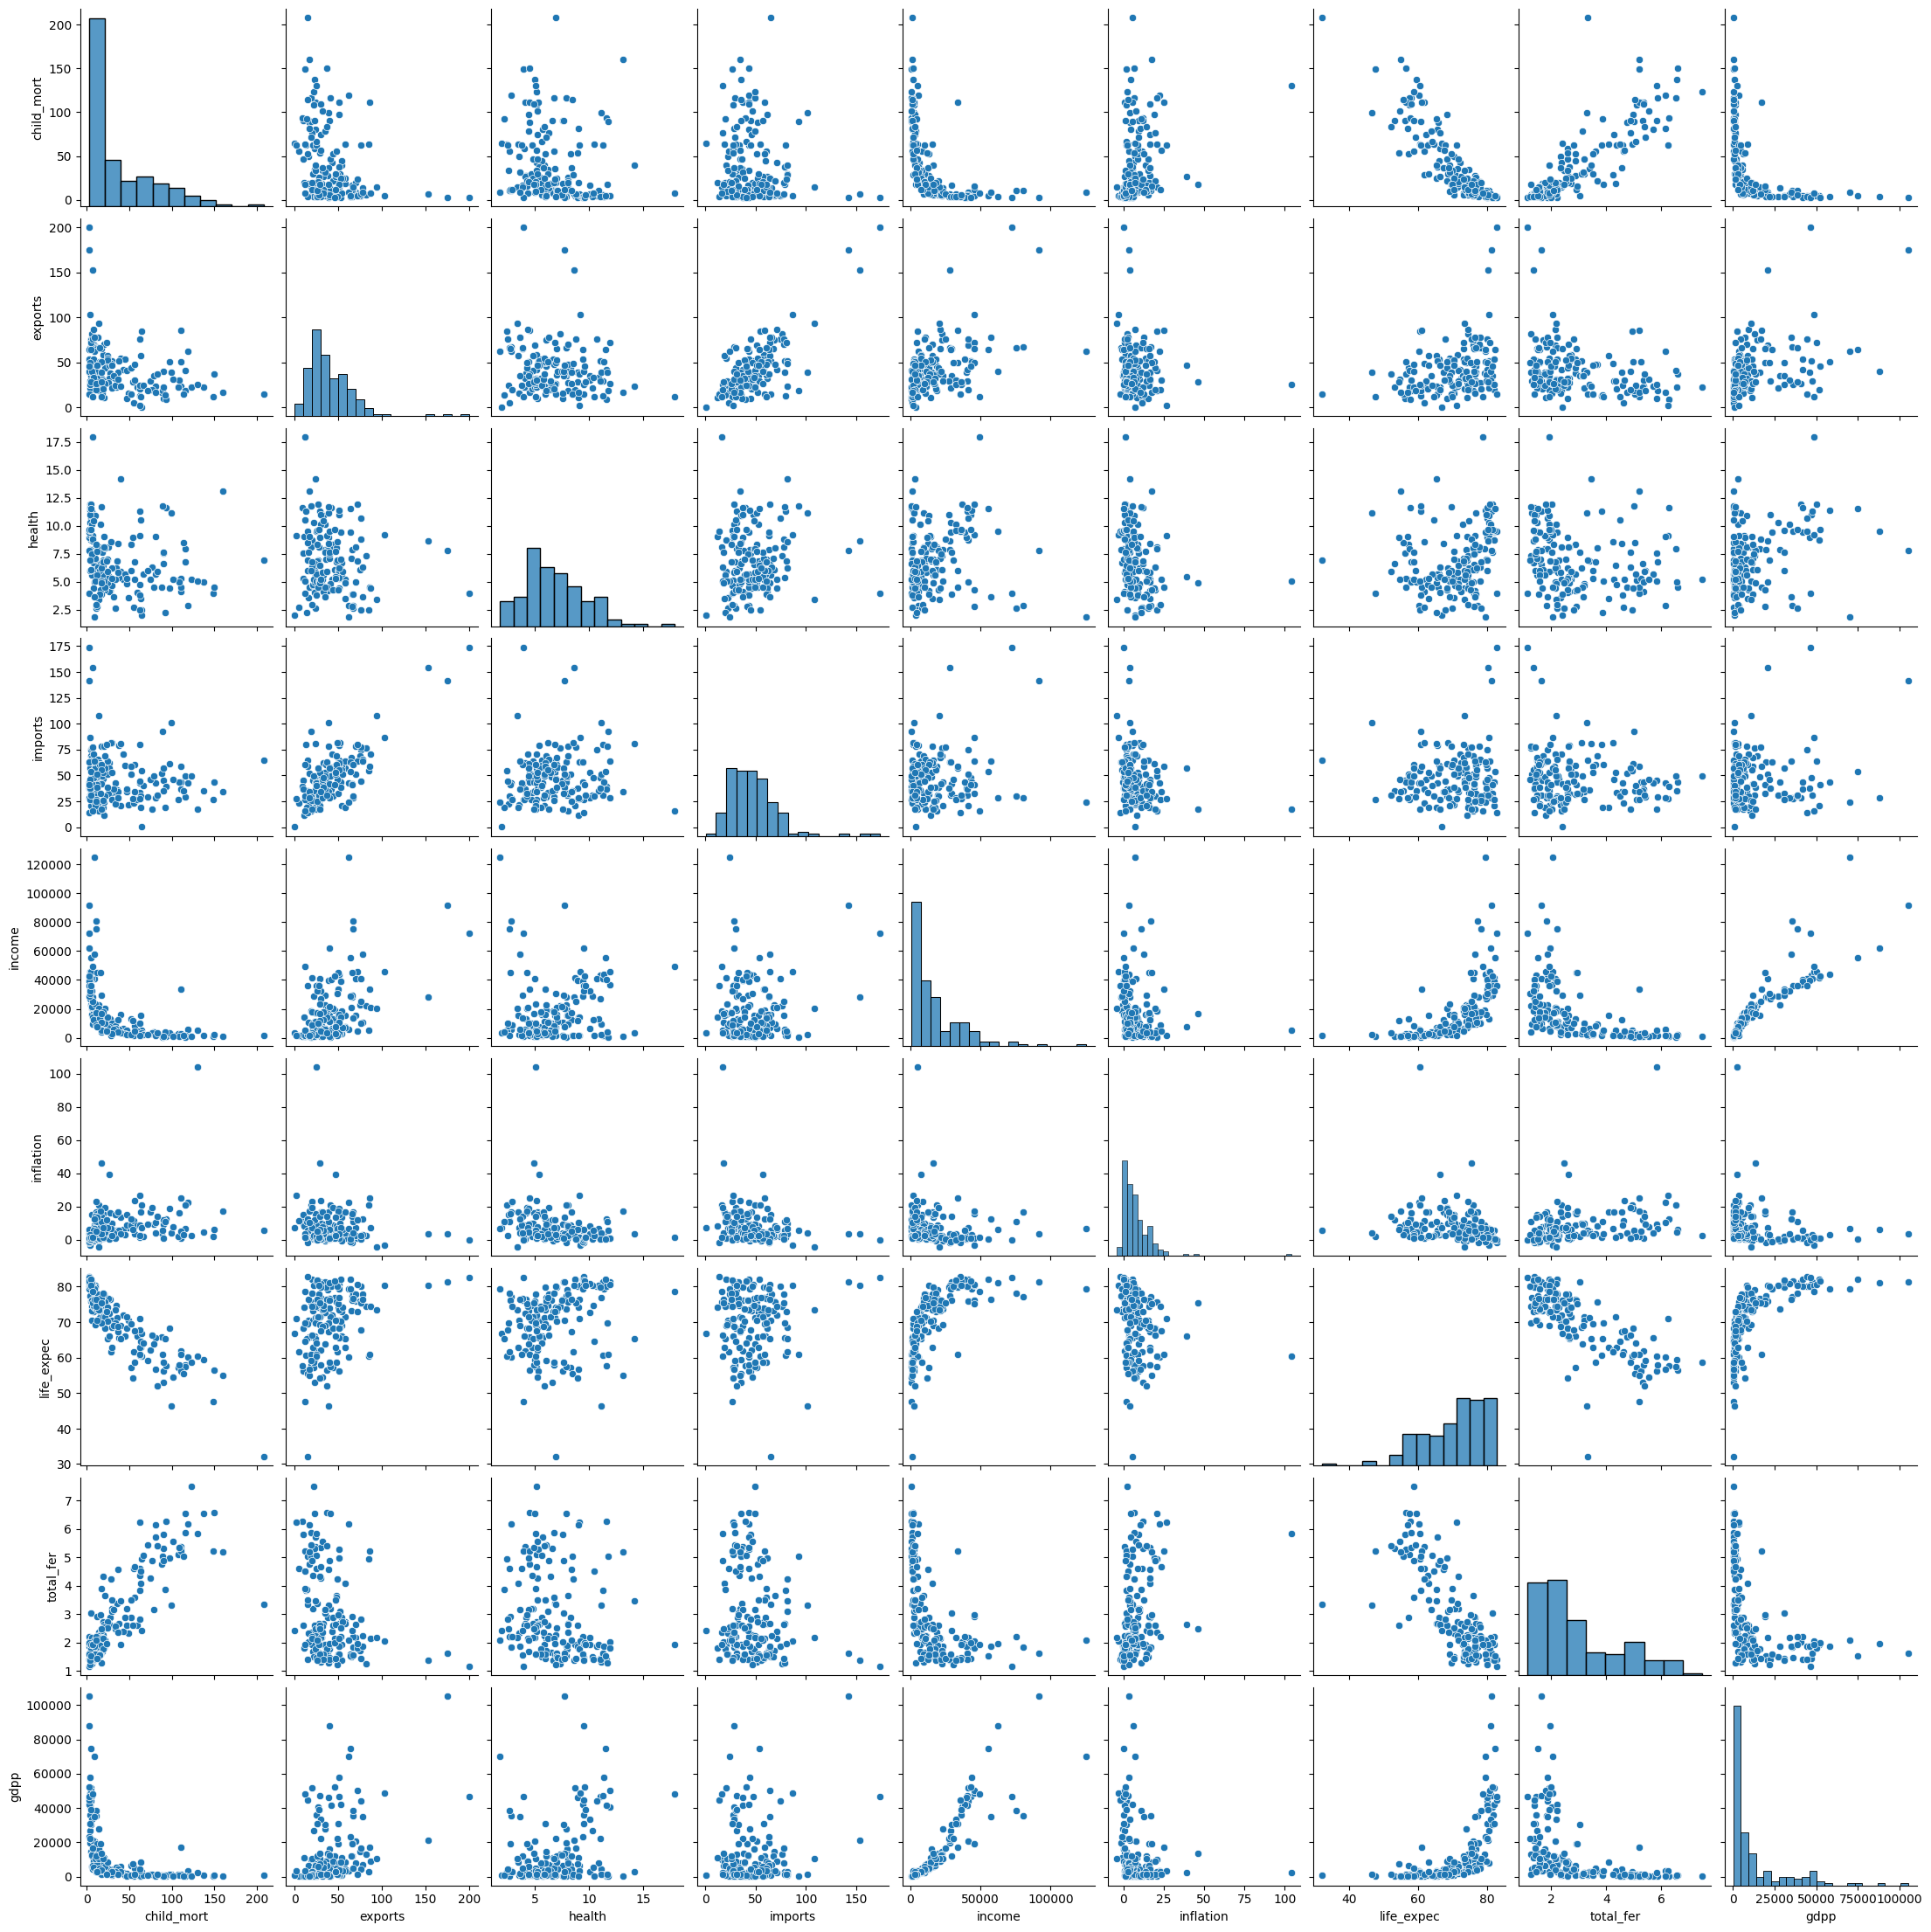

KeyError: ignored

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

# Load the dataset
data = pd.read_csv('Country-data.csv')

# EDA
print(data.info())
print(data.describe())

# Visualize the distribution of features
sns.pairplot(data)
plt.show()

# Preprocess the data by standardizing features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Country', axis=1))  # Assuming 'Country' is a column containing country names

# Convert scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.columns[1:])

# Verify the scaled data
print(scaled_df.head())


# Implement PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_df)

# Calculate the explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Identify the optimal number of components based on explained variance
cumulative_var_ratio = np.cumsum(explained_var_ratio)
optimal_components = np.argmax(cumulative_var_ratio >= 0.95) + 1

# Visualize explained variance ratio
plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Select the optimal number of components
pca = PCA(n_components=optimal_components)
pca_result_optimal = pca.fit_transform(scaled_df)

# Create scatter plots and heatmaps for visualization
# (scatter plots and heatmaps can be created based on specific components)
# Example:
sns.scatterplot(x=pca_result_optimal[:, 0], y=pca_result_optimal[:, 1])
plt.title('PCA Scatter Plot')
plt.show()

sns.heatmap(pca.components_, annot=True, cmap='viridis', yticklabels=['PC1', 'PC2'])
plt.title('PCA Components Heatmap')
plt.show()



# Apply K-Means clustering
k_values = range(2, 10)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result_optimal)
    inertia.append(kmeans.inertia_)

# Elbow Method
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Silhouette Score
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result_optimal)
    silhouette_scores.append(metrics.silhouette_score(pca_result_optimal, labels))

# Plot Silhouette Score
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

# Determine the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]

# Apply K-Means with optimal clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result_optimal)

# Plot clusters on a 2D scatter plot
plt.scatter(pca_result_optimal[:, 0], pca_result_optimal[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering Results')
plt.show()

# Perform an analysis of the clusters to identify characteristics
clustered_data = pd.concat([data['Country'], pd.DataFrame(pca_result_optimal, columns=[f'PC{i}' for i in range(1, optimal_components + 1)]), pd.Series(cluster_labels, name='Cluster')], axis=1)
cluster_analysis = clustered_data.groupby('Cluster').mean()

# Display cluster analysis
print(cluster_analysis)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics





"""# PreProcessing Data

## Outliers & Null_Values & Other Analysis



1.   Checking Null Value
2.   Handling Columns
3.   Handling Outliers

#### Printing Dataset Headers
"""
def load_data_file(file_path):
    names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
    data = pd.read_csv(file_path, names=names)
    return data

def load_data():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
    names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
    data = pd.read_csv(url, names=names)
    return data

    # Modify the handle_missing_values function
def handle_missing_values(data):
    data = data.replace('?', pd.NA)
    data = data.apply(pd.to_numeric, errors='coerce')
    data.fillna(data.mean(), inplace=True)  # Filling missing values with mean
    return data


def preprocess_data(data):
    data = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal'])
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.drop('num', axis=1))
    data = pd.DataFrame(scaled_data, columns=data.columns[:-1])
    data['num'] = data['num'].astype(int)
    return data

def visualize_data(data):
    sns.pairplot(data, hue='num')
    plt.title('Pairplot for the Dataset')
    plt.show()


# Loading  the dataset
data = pd.read_csv('Country-data.csv')
data.info()
# EDA
print(data.info())
print(data.describe())

# Visualize the distribution of features
sns.pairplot(data)
plt.show()



# Preprocess the data by standardizing features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Country', axis=1))  # Assuming 'Country' is a column containing country names

# Convert scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.columns[1:])

# Verify the scaled data
print(scaled_df.head())


# Implementing  PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_df)

# Calculate the explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Identify the optimal number of components based on explained variance
cumulative_var_ratio = np.cumsum(explained_var_ratio)
optimal_components = np.argmax(cumulative_var_ratio >= 0.95) + 1

# Visualize explained variance ratio
plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Select the optimal number of components
pca = PCA(n_components=optimal_components)
pca_result_optimal = pca.fit_transform(scaled_df)

# Create scatter plots and heatmaps for visualization
# (scatter plots and heatmaps can be created based on specific components)
# Example:
sns.scatterplot(x=pca_result_optimal[:, 0], y=pca_result_optimal[:, 1])
plt.title('PCA Scatter Plot')
plt.show()

sns.heatmap(pca.components_, annot=True, cmap='viridis', yticklabels=['PC1', 'PC2'])
plt.title('PCA Components Heatmap')
plt.show()



# Applying  K-Means clustering
k_values = range(2, 10)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result_optimal)
    inertia.append(kmeans.inertia_)

# Elbow Method
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Silhouette Score
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result_optimal)
    silhouette_scores.append(metrics.silhouette_score(pca_result_optimal, labels))

# Plotting  Silhouette Score
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

grid_search = GridSearchCV(DecisionTreeClassifier(criterion=best_criterion, random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best combination of hyperparameters: {best_params}")

# Extract the available options for max_features in Decision Tree
max_features_options_dt = X.shape[1] if best_params['max_features'] is None else best_params['max_features']
print(f"Available options for max_features in Decision Tree: {max_features_options_dt}")

# Determining  the optimal number of clusters
optimalk = k_values[np.argmax(silhouette_scores)]

# Applying K-Means with optimal clusters
kmeans = KMeans(n_clusters=optimalk, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result_optimal)

# Plot clusters on a 2D scatter plot
plt.scatter(pca_result_optimal[:, 0], pca_result_optimal[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering Results')
plt.show()

# Perform an analysis of the clusters to identify characteristics
clustered_data = pd.concat([data['Country'], pd.DataFrame(pca_result_optimal, columns=[f'PC{i}' for i in range(1, optimal_components + 1)]), pd.Series(cluster_labels, name='Cluster')], axis=1)
cluster_analysis = clustered_data.groupby('Cluster').mean()

# Displaying cluster analysis
print(cluster_analysis)
